In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import env
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy import stats

from math import sqrt

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# imports for modeling:
# import Logistic regression
from sklearn.linear_model import LogisticRegression
# import K Nearest neighbors:
from sklearn.neighbors import KNeighborsClassifier
# import Decision Trees:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
# import Random Forest:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

# interpreting our models:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

<h2>Load your zillow dataset.<h2/>

In [5]:
from wrangle import wrangle_zillow
df = wrangle_zillow()
df.head() 

,Bedroom_Count,Bathroom_Count,Finished_sqft,Tax_value_dollars,Year_built,Tax_amount,fips
2,0,0.0,73026.0,1434941.0,1959,20800.37,6037.0
3,0,0.0,5068.0,1174475.0,1948,14557.57,6037.0
4,0,0.0,1776.0,440101.0,1947,5725.17,6037.0
5,0,0.0,2400.0,287634.0,1943,3661.28,6037.0
7,0,0.0,3611.0,698984.0,1946,7857.84,6037.0


In [59]:
from wrangle import split_zillow_data
train, validate, test = split_zillow_data(df)
train.head()

,Bedroom_Count,Bathroom_Count,Finished_sqft,Tax_value_dollars,Year_built,Tax_amount,fips
515265,3,2.0,1388.0,347987.0,1955,4073.83,6037.0
2834387,5,3.0,2425.0,705314.0,1975,8140.72,6111.0
282747,1,1.0,1100.0,389612.0,2005,5095.62,6037.0
1087577,2,2.0,1215.0,367965.0,2002,4497.36,6037.0
1663081,4,2.0,1705.0,333600.0,1950,4731.08,6037.0


<h2>Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.<h2/>



In [72]:
# X -> set of all ind features
#y -> dependent variable, target
X = train[['Finished_sqft']]
y = train['Tax_value_dollars']

In [73]:
#Time to make, fit, & use the regression model using Ordinary Least Squares Linear Regression (OLS) method
from sklearn.linear_model import LinearRegression

#make
lm = LinearRegression()
#fit
lm.fit(X,y)
#use
yhat = lm.predict(X)

In [74]:
yhat[:5]

array([343911.13502213, 577329.61135969, 279085.17438065, 304970.54060902,
       415264.70975599])

x: Finished_sqft\
y: Tax_value_dollars\
baseline: Tax_value_dollars baseline prediction\
yhat: Tax_value_dollars OLS prediction

In [75]:
from sklearn.metrics import mean_squared_error, r2_score

In [69]:
# establish a best baseline
# two options:
# mean or median
# "best" as with our models is contingent on which one reduces error the most

In [76]:
baseline_med = y.median()
baseline_mean = y.mean()

In [77]:
y_pred = pd.DataFrame(
    {
    'y_act': y.values,
    'yhat' : yhat,
    'baseline_med': baseline_med,
    'baseline_mean': baseline_mean
    }, index=train.index)

In [78]:
# compute the error on these two baselines:
mean_baseline_rmse = mean_squared_error(y_pred.baseline_mean, y) ** (1/2)
med_baseline_rmse = mean_squared_error(y_pred.baseline_med, y) ** (1/2)

In [79]:
mean_baseline_rmse < med_baseline_rmse

True

In [80]:
#  mean providees our best baseline,
print(f'Root mean squared error for the mean value of home price is ${round(mean_baseline_rmse, 3)}.')

Root mean squared error for the mean value of home price is $723694.238.


<h2>Plot the residuals for the linear regression model that you made.<h2/>



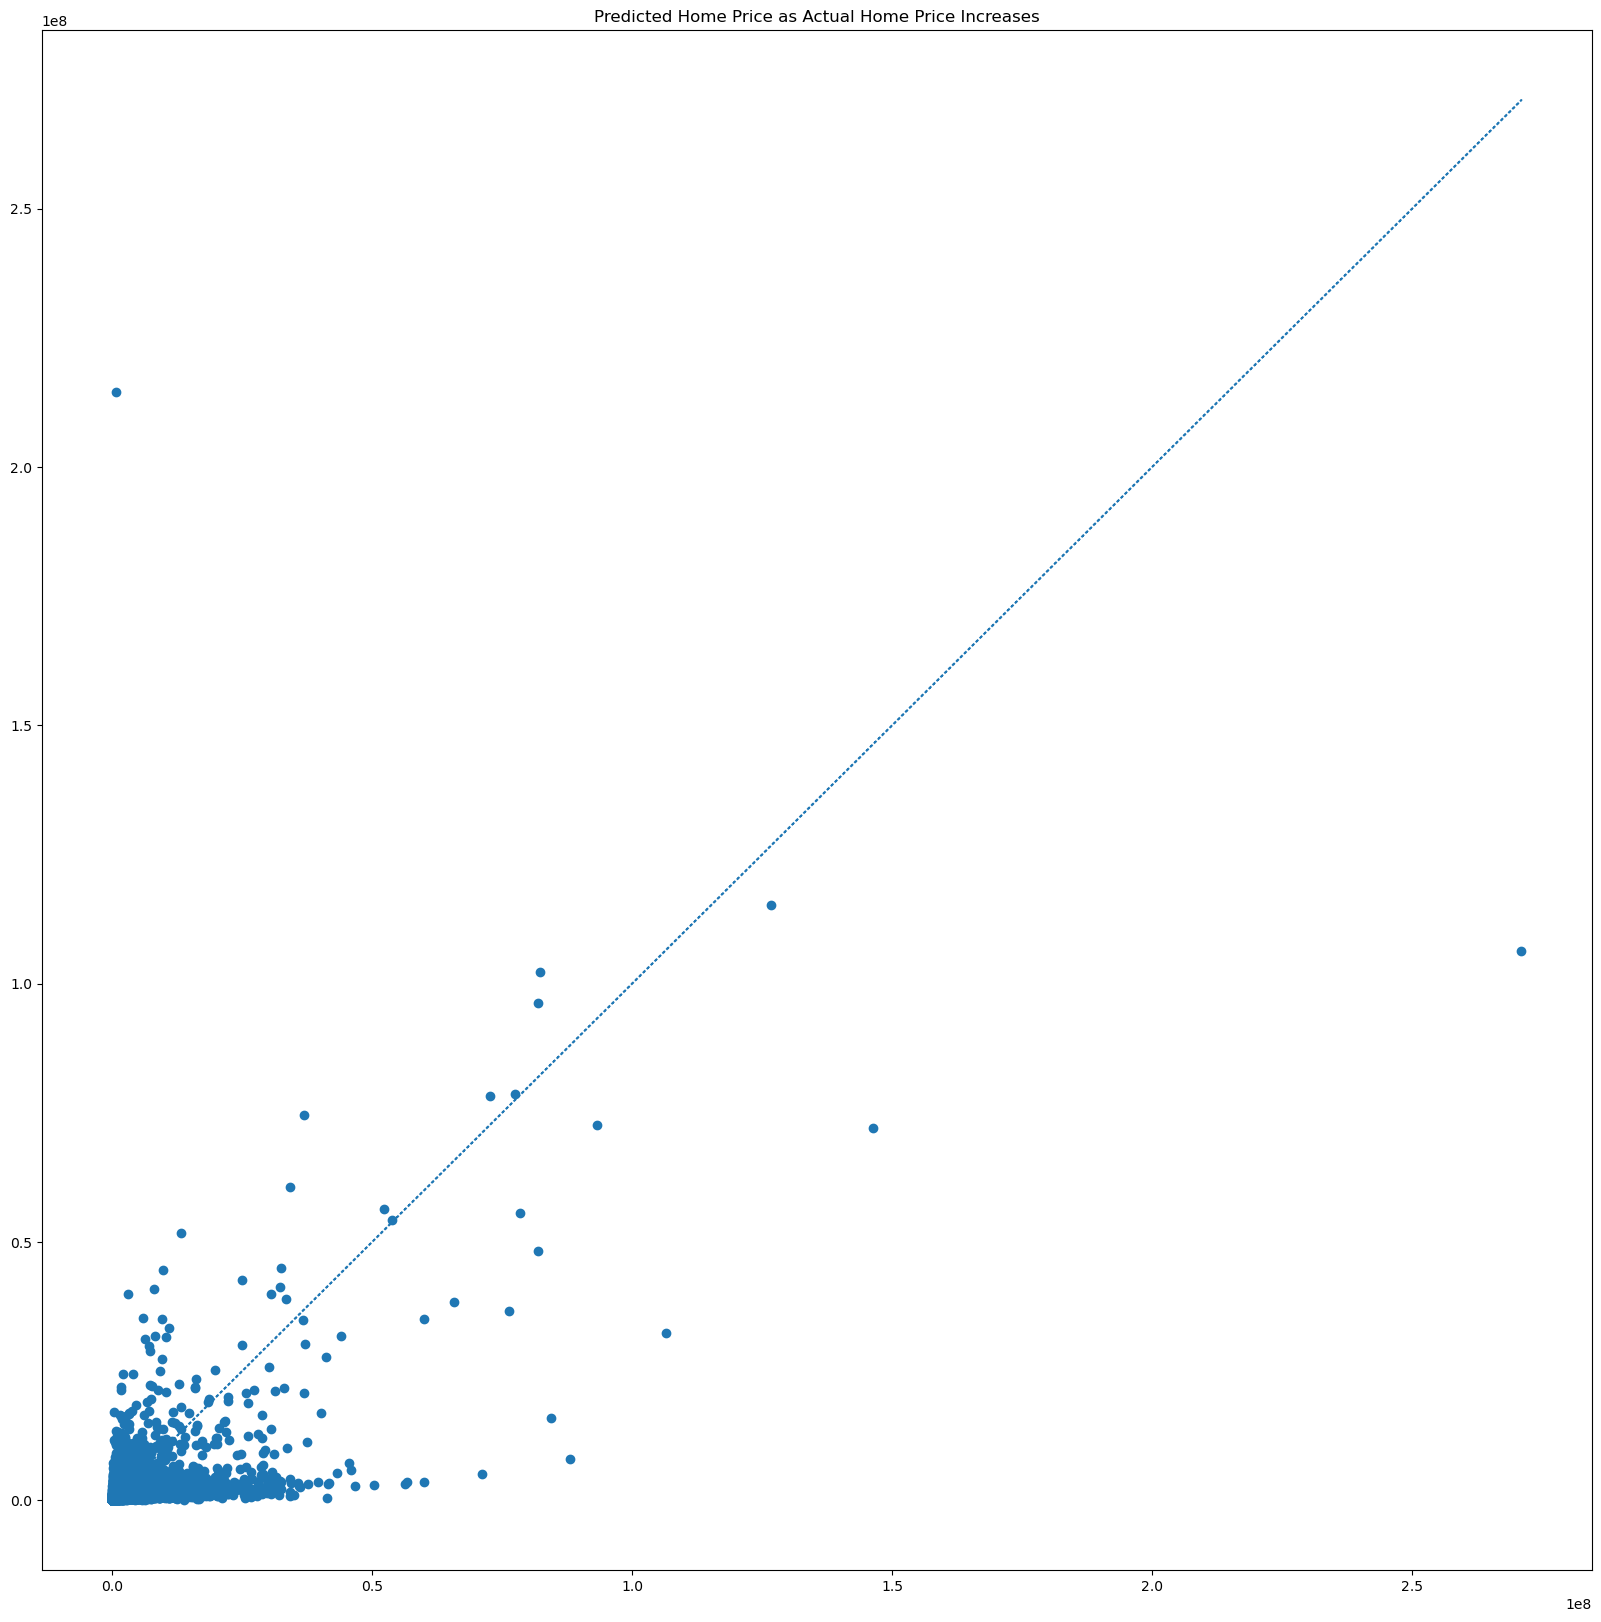

In [81]:
# plot residuals the first way
plt.figure(figsize=(20,20))
plt.scatter(y, yhat)
# x=x is y=y here, the cases where the vert axis matches the horiz axis
plt.plot(y,y, ls=':')
plt.title('Predicted Home Price as Actual Home Price Increases')
plt.show()

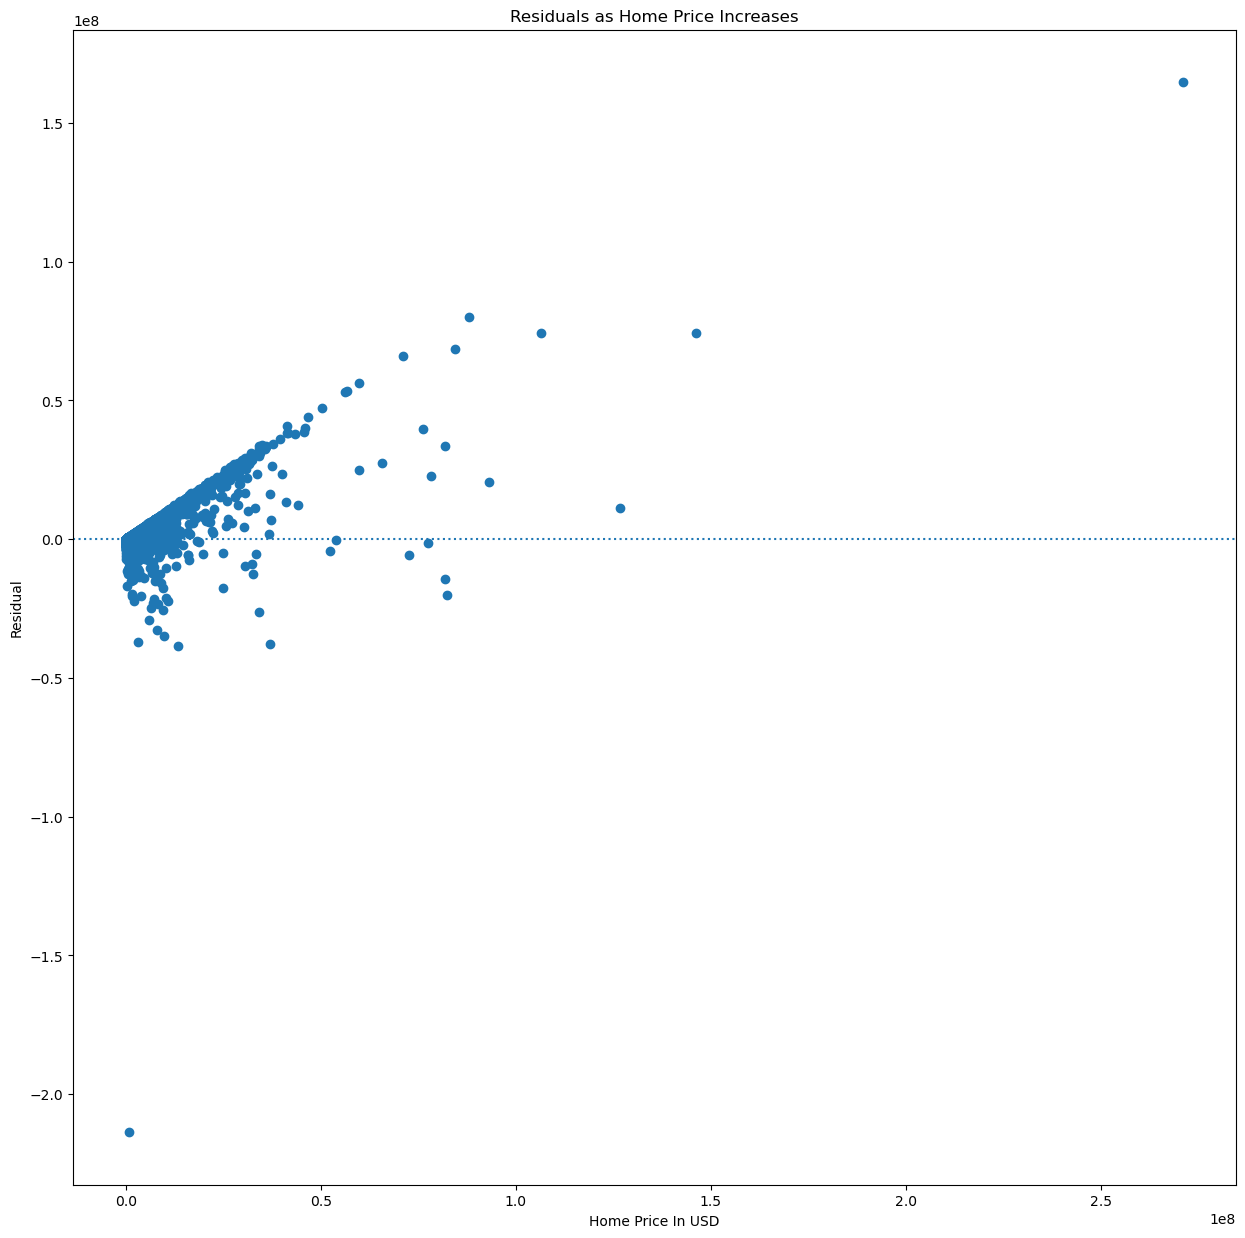

In [82]:
# plot them the other way
plt.figure(figsize=(15,15))
plt.scatter(y, (y-yhat))
plt.axhline(0,ls=':')
plt.title('Residuals as Home Price Increases')
plt.xlabel('Home Price In USD')
plt.ylabel('Residual')
plt.show()

<h2>Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.<h2/>



In [83]:
# Squared Errors, 
# residuals squared
squared_errors = (y_pred['y_act'] - y_pred['yhat']) ** 2
# Sum of Squared Error, 
sse = squared_errors.sum()
# Mean Squared error, 
mse = sse / train.shape[0] #alternatively, len(train), y_pred.shape[0]
# Root mean Squared Error
# square root the mean squared error!
rmse = mse**0.5

In [86]:
squared_errors

515265     1.661268e+07
2834387    1.638000e+10
282747     1.221618e+10
1087577    3.968302e+09
1663081    6.669125e+09
               ...     
1030898    8.753669e+09
145337     1.050820e+11
164743     2.801667e+10
674418     2.872767e+10
1042963    1.301047e+07
Length: 1625073, dtype: float64

In [85]:
sse

5.650244667254653e+17

In [87]:
mse

347691744755.7527

In [88]:
rmse

589653.9194779872

<h2>Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).<h2/>



In [90]:
# Squared Errors, 
# residuals squared
squared_errors_bl = (y_pred['y_act'] - y_pred['baseline_mean']) ** 2
# Sum of Squared Error, 
sse_bl = squared_errors_bl.sum()

sse, sse_bl

(5.650244667254653e+17, 8.511049264466789e+17)

<h2>Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.
<h2/>


In [92]:
sse_bl > sse

True

<h2>What is the amount of variance explained in your model?
<h2/>


In [94]:
# r^2 == ESS / TSS == ESS / (ESS + SSE)

In [96]:
# ESS = Δ(y_pred, y_mean)
ESS = ((y_pred['yhat'] - y_pred['baseline_mean']) ** 2).sum()

In [97]:
ESS

2.86080459721962e+17

In [98]:
sse

5.650244667254653e+17

In [99]:
ESS / (ESS + sse)

0.3361283090160014

In [100]:
# actual r_squared score
r2_score(y, y_pred['yhat'])

0.3361283090154177

<h2>Is your model better than the baseline model?
<h2/>


In [ ]:
# lets compare the rmse of our model 
# to the rmse of our baseline

In [101]:
mean_baseline_rmse > mean_squared_error(y, y_pred['yhat'], squared=False)

True

In [102]:
mean_baseline_rmse

723694.2379898897

In [103]:
mean_squared_error(y, y_pred['yhat'], squared=False)

589653.9194779872